In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
abt_path = '../data/raw/GSEP_List.csv'
df = pd.read_csv(abt_path, sep=',',index_col='sep_index')
df

,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,lasco_cme_width,...,start_fr,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag
sep_index,,,,,,,,,,,,,,,,,,,,,
gsep_001,psep_012,NaN,2/4/1986 9:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,2/3/1986 21:25,2/4/1986 17:45,0
gsep_002,psep_013,NaN,2/5/1986 17:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,2/5/1986 5:50,2/6/1986 8:35,0
gsep_003,psep_014,NaN,2/6/1986 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/5/1986 23:00,2/7/1986 13:25,1
gsep_004,psep_015,NaN,2/7/1986 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,S,Taken by 6,NaN,NaN,AR from LMSAL-HEK,2/7/1986 1:00,2/8/1986 22:20,1
gsep_005,psep_016,NaN,2/10/1986 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/10/1986 9:00,2/12/1986 6:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gsep_338,NaN,cdaw_sep_149,7/14/2017 9:00,7/14/2017 4:40,7/14/2017 23:20,22.0,lasco_28753,7/14/2017 1:02,7/14/2017 1:25,360.0,...,14000.0,1,P,NaN,NaN,NaN,Type II Radio burst From CDAW list,7/13/2017 21:00,7/16/2017 19:40,1
gsep_338_1,NaN,NaN,7/25/2017 3:00,NaN,NaN,NaN,NaN,NaN,7/23/2017 4:36,93.0,...,NaN,0,P,NaN,NaN,NaN,NaN,7/24/2017 15:00,7/26/2017 4:00,0
gsep_339,NaN,cdaw_sep_150,9/5/2017 0:40,9/4/2017 22:30,9/5/2017 19:20,210.0,lasco_28869,9/4/2017 20:13,9/4/2017 20:36,360.0,...,14000.0,1,P,NaN,NaN,NaN,Type II Radio burst From CDAW list,9/4/2017 12:40,9/6/2017 12:30,1


CME Prediction Using Random Forest Regressor

In [4]:
cme_features = ["cme_launch_time","cme_1st_app_time","lasco_cme_width","p_cme_width","lasco_linear_speed","p_cme_speed","ppf_gt10MeV"]
df_cme = df[cme_features]
df_cme = df_cme.dropna()    # Drop rows with NaN values
df_cme


,cme_launch_time,cme_1st_app_time,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,ppf_gt10MeV
sep_index,,,,,,,
gsep_136,11/4/1997 5:11,11/4/1997 6:10,360.0,360.0,785.0,785.0,54.49
gsep_137,11/6/1997 11:30,11/6/1997 12:10,360.0,360.0,1556.0,1556.0,437.32
gsep_138,4/20/1998 9:49,4/20/1998 10:07,243.0,150.0,1863.0,1863.0,1212.01
gsep_139,4/29/1998 16:22,4/29/1998 16:58,360.0,360.0,1374.0,1374.0,3.58
gsep_140,5/2/1998 13:07,5/2/1998 14:06,360.0,360.0,938.0,938.0,121.90
...,...,...,...,...,...,...,...
gsep_315,8/31/2012 19:36,8/31/2012 20:00,360.0,360.0,1442.0,1442.0,34.44
gsep_316,9/27/2012 23:19,9/28/2012 0:12,360.0,360.0,947.0,947.0,19.60
gsep_317,12/14/2012 1:37,12/14/2012 2:00,149.0,149.0,763.0,763.0,6.01


In [5]:
# Convert the columns to datetime and check if any of the values in cme_1st_app_time are less than cme_launch_time
df_cme["cme_1st_app_time"] = pd.to_datetime(df_cme["cme_1st_app_time"], errors="coerce")
df_cme["cme_launch_time"] = pd.to_datetime(df_cme["cme_launch_time"], errors="coerce")

invalid_rows = df_cme[df_cme["cme_1st_app_time"] < df_cme["cme_launch_time"]]

if invalid_rows.empty:
    print("All values in cme_1st_app_time are greater than cme_launch_time.")
else:
    print("Rows where cme_1st_app_time is NOT greater than cme_launch_time:")
    print(invalid_rows[["cme_1st_app_time", "cme_launch_time"]].to_string(index=True))

Rows where cme_1st_app_time is NOT greater than cme_launch_time:
             cme_1st_app_time     cme_launch_time
sep_index                                        
gsep_172  2000-10-25 08:26:00 2000-10-25 08:43:00
gsep_178  2001-01-20 21:30:00 2001-01-21 18:49:00


In [6]:
# Calculate CME launch-to-first appearance interval
df_cme["cme_1st_app_time"] = pd.to_datetime(df_cme["cme_1st_app_time"])
df_cme["cme_launch_time"] = pd.to_datetime(df_cme["cme_launch_time"])

# Calculate the interval
df_cme["cme_lf_interval"] = df_cme["cme_1st_app_time"] - df_cme["cme_launch_time"]
# Convert the interval to minutes
df_cme["cme_lf_interval"] = df_cme["cme_lf_interval"].dt.total_seconds() / 60
df_cme

,cme_launch_time,cme_1st_app_time,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,ppf_gt10MeV,cme_lf_interval
sep_index,,,,,,,,
gsep_136,1997-11-04 05:11:00,1997-11-04 06:10:00,360.0,360.0,785.0,785.0,54.49,59.0
gsep_137,1997-11-06 11:30:00,1997-11-06 12:10:00,360.0,360.0,1556.0,1556.0,437.32,40.0
gsep_138,1998-04-20 09:49:00,1998-04-20 10:07:00,243.0,150.0,1863.0,1863.0,1212.01,18.0
gsep_139,1998-04-29 16:22:00,1998-04-29 16:58:00,360.0,360.0,1374.0,1374.0,3.58,36.0
gsep_140,1998-05-02 13:07:00,1998-05-02 14:06:00,360.0,360.0,938.0,938.0,121.90,59.0
...,...,...,...,...,...,...,...,...
gsep_315,2012-08-31 19:36:00,2012-08-31 20:00:00,360.0,360.0,1442.0,1442.0,34.44,24.0
gsep_316,2012-09-27 23:19:00,2012-09-28 00:12:00,360.0,360.0,947.0,947.0,19.60,53.0
gsep_317,2012-12-14 01:37:00,2012-12-14 02:00:00,149.0,149.0,763.0,763.0,6.01,23.0


In [7]:
to_csv_path = '../data/processed/cme_features.csv'
df_cme.to_csv(to_csv_path)

In [8]:
#Data Normalization
df_cme = df_cme.apply(lambda x : (x -x.min())/(x.max()-x.min()))
df_cme

,cme_launch_time,cme_1st_app_time,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,ppf_gt10MeV,cme_lf_interval
sep_index,,,,,,,,
gsep_136,0.000000,0.000000,1.000000,1.000000,0.178143,0.178143,0.002016,0.318571
gsep_137,0.000403,0.000401,1.000000,1.000000,0.421668,0.421668,0.016828,0.314048
gsep_138,0.029802,0.029797,0.658892,0.387755,0.518636,0.518636,0.046800,0.308810
gsep_139,0.031455,0.031453,1.000000,1.000000,0.364182,0.364182,0.000046,0.313095
gsep_140,0.031966,0.031966,1.000000,1.000000,0.226469,0.226469,0.004624,0.318571
...,...,...,...,...,...,...,...,...
gsep_315,0.965160,0.965158,1.000000,1.000000,0.385660,0.385660,0.001240,0.310238
gsep_316,0.970000,0.970002,1.000000,1.000000,0.229311,0.229311,0.000666,0.317143
gsep_317,0.983743,0.983740,0.384840,0.384840,0.171194,0.171194,0.000140,0.310000


In [9]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X=df_cme.drop(["cme_launch_time","cme_1st_app_time","ppf_gt10MeV"],axis=1)
Y=df_cme["ppf_gt10MeV"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, Y_train)
y_pred = rf_reg.predict(X_test)
print("Mean_squared_error: ", mean_squared_error(Y_test, y_pred))
print("R2_score: ", r2_score(Y_test, y_pred))
print("Feature Importances: ", rf_reg.feature_importances_)


Mean_squared_error:  0.024528987040449673
R2_score:  -0.48376110345512546
Feature Importances:  [0.03693402 0.01006287 0.37664896 0.38087593 0.19547821]


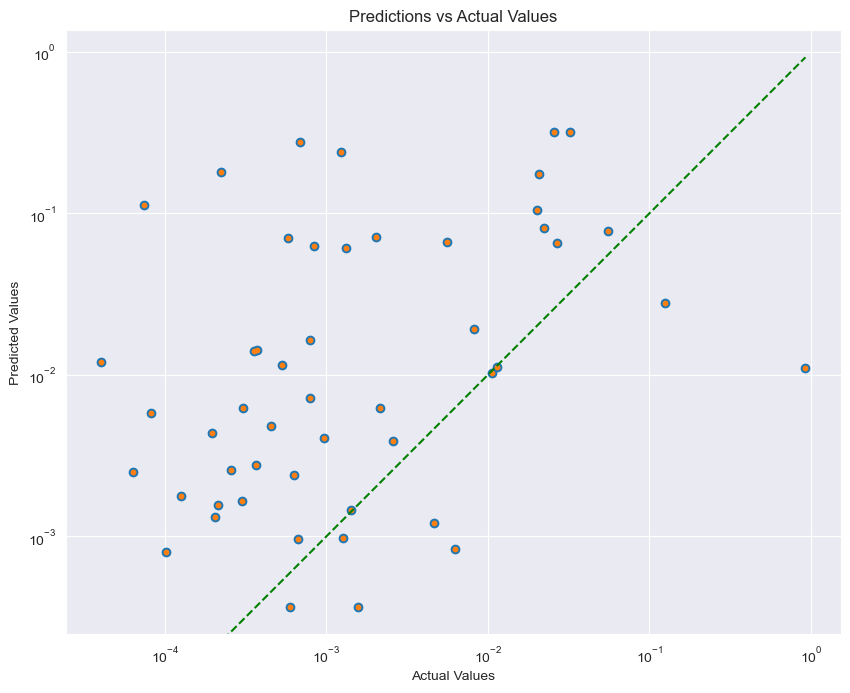

In [11]:
# 1. Scatter Plot (Predictions vs Actuals)
plt.figure(figsize=(10, 10))
plt.yscale('log')
plt.xscale('log')
plt.scatter(Y_test, y_pred)
plt.scatter(Y_test, y_pred, s = 10 , alpha=1)
min_val = min(min(Y_test), min(y_pred))  # Smallest value in data
max_val = max(max(Y_test), max(y_pred))  # Largest value in data
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='Perfect Prediction Line')
plt.title("Predictions vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.gca().set_aspect('equal', adjustable='box')  # Ensure similar scale on both axes
plt.grid(True)
plt.show()



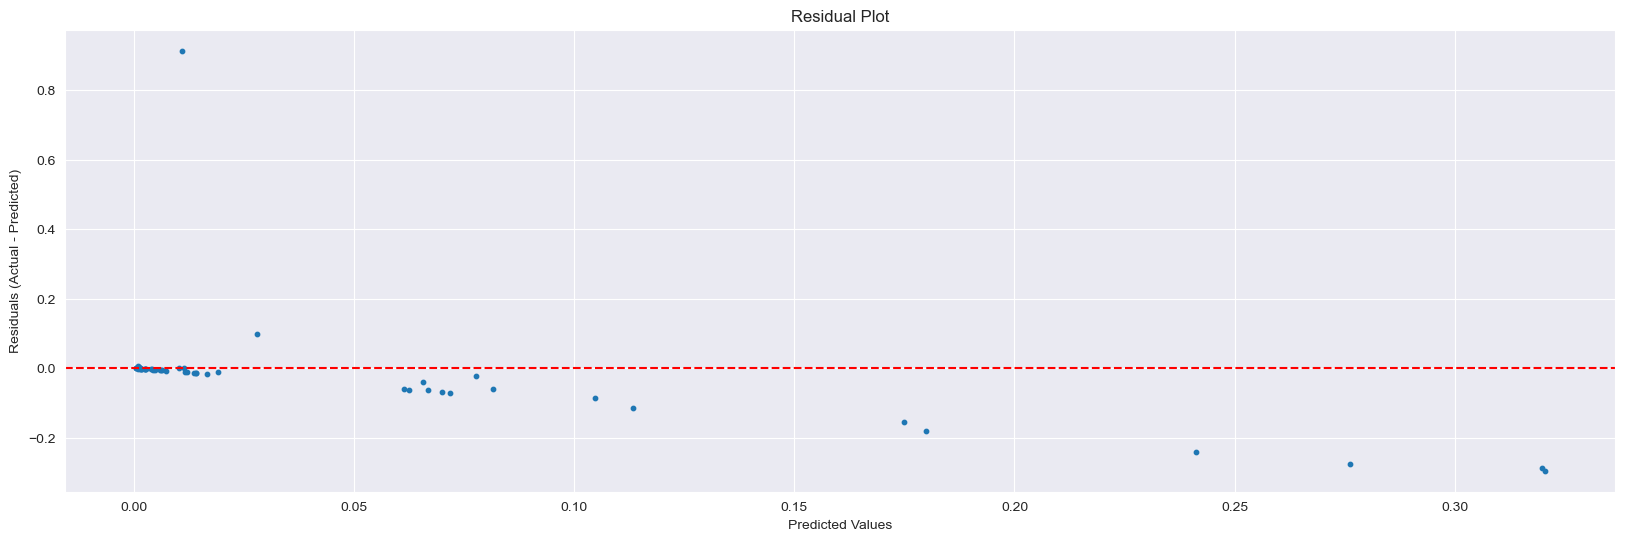

In [12]:
# 2. Residual Plot
residuals = Y_test - y_pred
plt.figure(figsize=(20, 6))
# plt.yscale('log')
# plt.xscale('log')
plt.scatter(y_pred, residuals, s = 10, alpha = 1)
plt.axhline(y=0, color='red', linestyle='--')  # Perfect prediction line
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

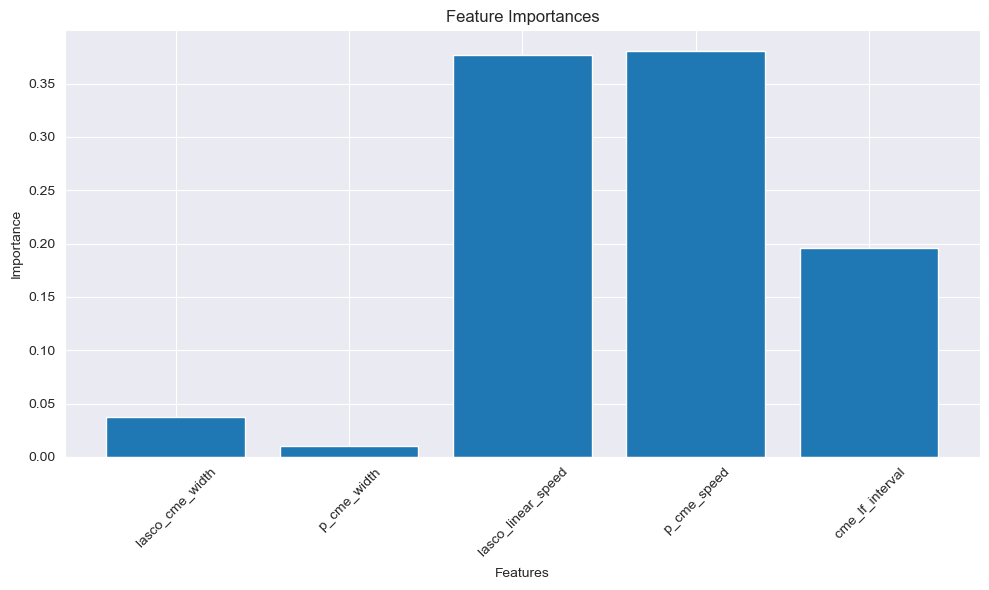

In [13]:
# 3. Feature Importances
feature_importances = rf_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), [f" {X.columns[i]}" for i in range(len(X.columns))], rotation=45)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### Plots Description:
1. **Predictions vs Actuals (Scatter Plot)**:
    - This plot visualizes how well the model predictions align with actual values.
    - The red dashed line represents the perfect prediction line (`y_pred = Y_test`).

2. **Residual Plot**:
    - The residual plot shows the errors (differences between predicted and actual values) for each prediction.
    - Ideally, residuals should be randomly distributed and centered around zero.

3. **Feature Importances**:
    - This bar chart shows how critical each feature is to the model's predictions.
    - It helps identify which features have the most impact.

### Additional Explanation:
- **Metics for Regression**:
    - **Mean Squared Error (MSE)**: Penalizes large errors more than smaller ones.
    - **Mean Absolute Error (MAE)**: Provides a straightforward average of errors.
    - **R2 Score**: Represents how well the model explains the variability of the target variable.

Flare Prediction Model based on Random Forest Regression

In [14]:
fl_features = ["fl_rise_time","fl_lon","fl_lat","fl_goes_class","fluence_gt10MeV"]
df_fl = df[fl_features]
df_fl = df_fl.dropna()    # Drop rows with NaN values
df_fl

,fl_rise_time,fl_lon,fl_lat,fl_goes_class,fluence_gt10MeV
sep_index,,,,,
gsep_001,5.0,-21.0,-3.0,X3.0,141000.0
gsep_002,16.0,-6.0,-7.0,M3.0,287000.0
gsep_003,7.0,2.0,-7.0,X1.7,3600000.0
gsep_004,18.0,21.0,-11.0,M5.2,6620000.0
gsep_005,23.0,32.0,-1.0,C9.5,271000.0
...,...,...,...,...,...
gsep_313,101.0,90.0,-17.0,M7.7,5260000.0
gsep_315,58.0,-42.0,-19.0,C8.4,3300000.0
gsep_316,21.0,36.0,9.0,C3.7,996000.0


In [15]:
df_fl["fl_goes_class"].str[0:1].unique()

array(['X', 'M', 'C'], dtype=object)

In [16]:
from sunkit_instruments.goes_xrs import flareclass_to_flux
df_fl["fl_goes_class"] = df_fl["fl_goes_class"].astype(str)
df_fl["GOES_X_ray_flux_value"] = df_fl["fl_goes_class"].apply(flareclass_to_flux).astype(str)
df_fl["GOES_X_ray_flux_value"] = df_fl["GOES_X_ray_flux_value"].str.replace(" W / m2", "").astype(float)
df_fl

,fl_rise_time,fl_lon,fl_lat,fl_goes_class,fluence_gt10MeV,GOES_X_ray_flux_value
sep_index,,,,,,
gsep_001,5.0,-21.0,-3.0,X3.0,141000.0,0.000300
gsep_002,16.0,-6.0,-7.0,M3.0,287000.0,0.000030
gsep_003,7.0,2.0,-7.0,X1.7,3600000.0,0.000170
gsep_004,18.0,21.0,-11.0,M5.2,6620000.0,0.000052
gsep_005,23.0,32.0,-1.0,C9.5,271000.0,0.000009
...,...,...,...,...,...,...
gsep_313,101.0,90.0,-17.0,M7.7,5260000.0,0.000077
gsep_315,58.0,-42.0,-19.0,C8.4,3300000.0,0.000008
gsep_316,21.0,36.0,9.0,C3.7,996000.0,0.000004


In [42]:
df_fl_numeric = df_fl.drop("fl_goes_class", axis=1)
df_fl_numeric= df_fl_numeric.apply(lambda x: (x -x.min())/(x.max()-x.min()))
df_fl_numeric



,fl_rise_time,fl_lon,fl_lat,fluence_gt10MeV,GOES_X_ray_flux_value
sep_index,,,,,
gsep_001,0.016026,0.348018,0.423077,0.000125,0.106760
gsep_002,0.051282,0.414097,0.371795,0.000284,0.010290
gsep_003,0.022436,0.449339,0.371795,0.003909,0.060312
gsep_004,0.057692,0.533040,0.320513,0.007213,0.018151
gsep_005,0.073718,0.581498,0.448718,0.000267,0.002966
...,...,...,...,...,...
gsep_313,0.323718,0.837004,0.243590,0.005725,0.027083
gsep_315,0.185897,0.255507,0.217949,0.003581,0.002573
gsep_316,0.067308,0.599119,0.576923,0.001060,0.000893


In [44]:
to_csv_path = '../data/processed/fl_features.csv'
df_fl_numeric.to_csv(to_csv_path)


In [18]:
from sklearn.model_selection import train_test_split
X_fl=df_fl_numeric.drop(["fluence_gt10MeV"],axis=1)
Y_fl=df_fl_numeric["fluence_gt10MeV"]
X_fl_train, X_fl_test, Y_fl_train, Y_fl_test = train_test_split(X_fl,Y_fl,test_size=0.33,random_state=42)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
fl_rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
fl_rf_reg.fit(X_fl_train, Y_fl_train)
y_fl_pred = fl_rf_reg.predict(X_fl_test)
print("Mean_squared_error: ", mean_squared_error(Y_fl_test, y_fl_pred))
print("R2_score: ", r2_score(Y_fl_test, y_fl_pred))
print("Feature Importances: ", fl_rf_reg.feature_importances_)

Mean_squared_error:  0.021229538161251046
R2_score:  0.026270754690036813
Feature Importances:  [0.18702283 0.20414132 0.12332375 0.48551211]


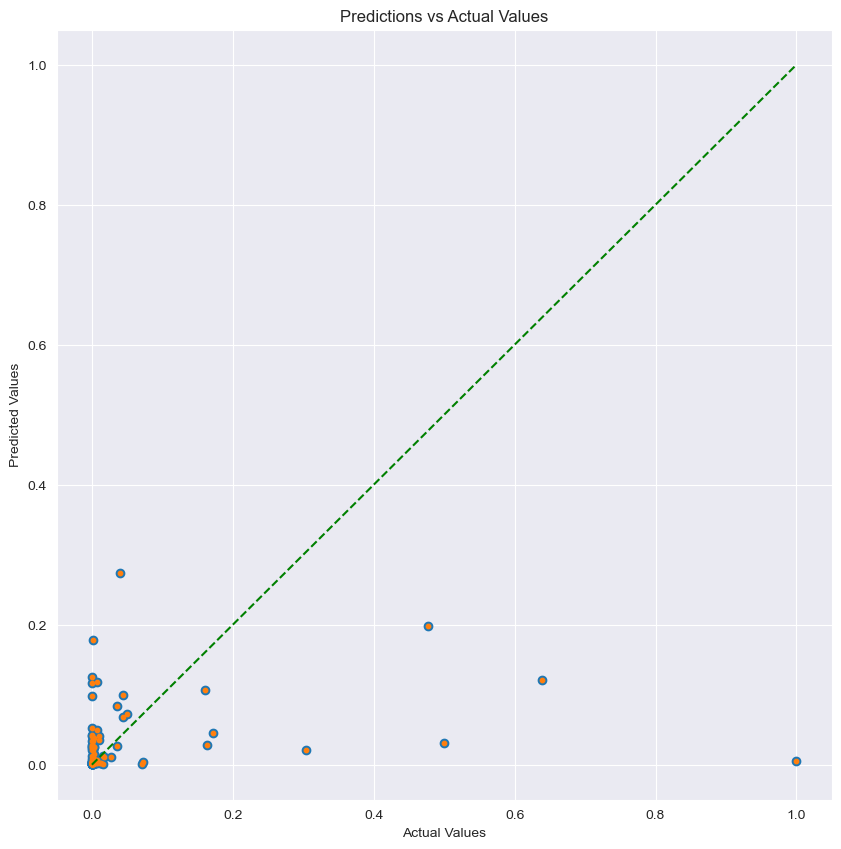

In [20]:
# 1. Scatter Plot (Predictions vs Actuals)
plt.figure(figsize=(10, 10))
# plt.yscale('log')
# plt.xscale('log')
plt.scatter(Y_fl_test, y_fl_pred)
plt.scatter(Y_fl_test, y_fl_pred, s = 10 , alpha=1)
min_val = min(min(Y_fl_test), min(y_fl_pred))  # Smallest value in data
max_val = max(max(Y_fl_test), max(y_fl_pred))  # Largest value in data
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='Perfect Prediction Line')
plt.title("Predictions vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


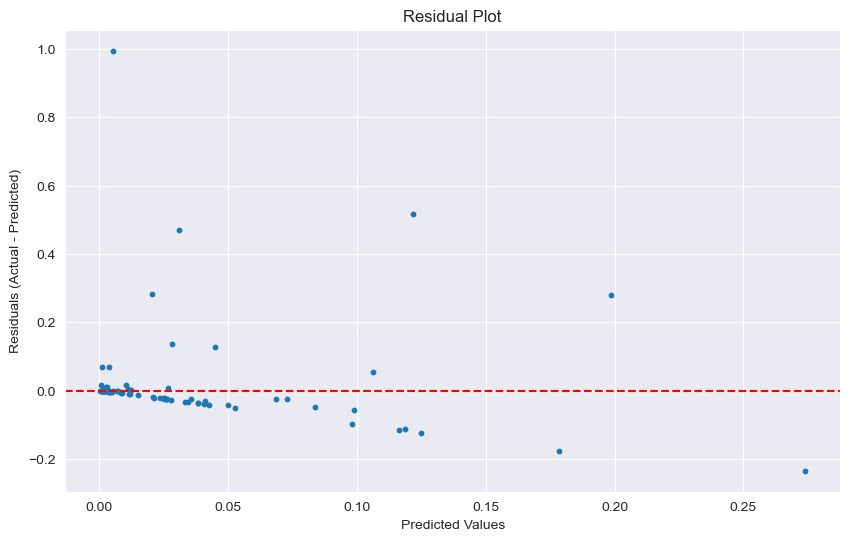

In [21]:
# 2. Residual Plot
residuals_fl = Y_fl_test - y_fl_pred
plt.figure(figsize=(10, 6))
# plt.yscale('log')
# plt.xscale('log')
plt.scatter(y_fl_pred, residuals_fl, s = 10, alpha = 1)
plt.axhline(y=0, color='red', linestyle='--')  # Perfect prediction line
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


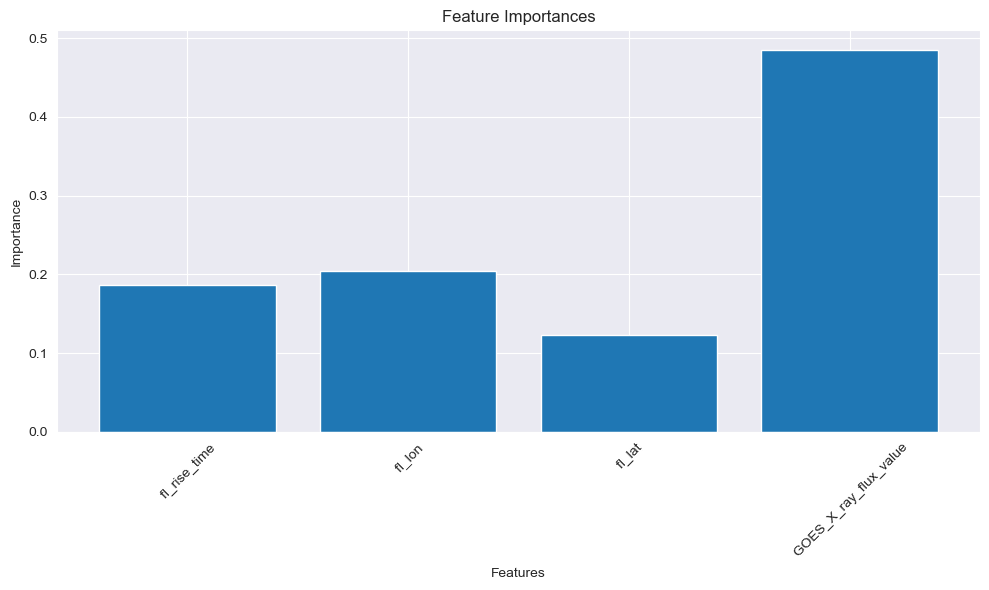

In [22]:
# 3. Feature Importances
feature_importances_fl = fl_rf_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_fl)), feature_importances_fl, align='center')
plt.xticks(range(len(feature_importances_fl)), [f" {X_fl.columns[i]}" for i in range(len(X_fl.columns))], rotation=45)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

CME-FLARE Prediction using Random Forest Regressor

In [29]:
cme_fl_features = ["cme_launch_time","cme_1st_app_time","lasco_cme_width","p_cme_width","lasco_linear_speed","p_cme_speed","ppf_gt10MeV","fl_rise_time","fl_lon","fl_lat","fl_goes_class","fluence_gt10MeV","gsep_fluence_gt10MeV","gsep_pf_gt10MeV"]
df_cme_fl = df[cme_fl_features]
df_cme_fl = df_cme_fl.dropna()  # Drop rows with NaN values
df_cme_fl

,cme_launch_time,cme_1st_app_time,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,ppf_gt10MeV,fl_rise_time,fl_lon,fl_lat,fl_goes_class,fluence_gt10MeV,gsep_fluence_gt10MeV,gsep_pf_gt10MeV
sep_index,,,,,,,,,,,,,,
gsep_136,11/4/1997 5:11,11/4/1997 6:10,360.0,360.0,785.0,785.0,54.49,6.0,33.0,-14.0,X2.1,2630000.0,24553809,67.1000
gsep_137,11/6/1997 11:30,11/6/1997 12:10,360.0,360.0,1556.0,1556.0,437.32,6.0,63.0,-18.0,X9.4,33200000.0,418249780,532.0000
gsep_138,4/20/1998 9:49,4/20/1998 10:07,243.0,150.0,1863.0,1863.0,1212.01,43.0,119.0,-17.0,M1.4,97400000.0,1557756330,1610.0000
gsep_139,4/29/1998 16:22,4/29/1998 16:58,360.0,360.0,1374.0,1374.0,3.58,31.0,-20.0,-18.0,M6.8,570000.0,2092392,2.5100
gsep_140,5/2/1998 13:07,5/2/1998 14:06,360.0,360.0,938.0,938.0,121.90,11.0,15.0,-15.0,X1.1,4540000.0,38232894,149.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gsep_313,7/19/2012 5:05,7/19/2012 5:24,360.0,360.0,1631.0,1931.0,54.92,101.0,90.0,-17.0,M7.7,5260000.0,88492753,79.6060
gsep_315,8/31/2012 19:36,8/31/2012 20:00,360.0,360.0,1442.0,1442.0,34.44,58.0,-42.0,-19.0,C8.4,3300000.0,51451197,59.8940
gsep_316,9/27/2012 23:19,9/28/2012 0:12,360.0,360.0,947.0,947.0,19.60,21.0,36.0,9.0,C3.7,996000.0,6405767,28.4310


In [37]:
df_cme_fl.shape

(130, 16)

In [30]:
df_cme_fl["cme_1st_app_time"] = pd.to_datetime(df_cme_fl["cme_1st_app_time"])
df_cme_fl["cme_launch_time"] = pd.to_datetime(df_cme_fl["cme_launch_time"])
df_cme_fl["cme_lf_interval"] = df_cme_fl["cme_1st_app_time"] - df_cme_fl["cme_launch_time"]
df_cme_fl["cme_lf_interval"] = df_cme_fl["cme_lf_interval"].dt.total_seconds() / 60
df_cme_fl["fl_goes_class"] = df_cme_fl["fl_goes_class"].astype(str)
df_cme_fl["GOES_X_ray_flux_value"] = df_cme_fl["fl_goes_class"].apply(flareclass_to_flux).astype(str)
df_cme_fl["GOES_X_ray_flux_value"] = df_cme_fl["GOES_X_ray_flux_value"].str.replace(" W / m2", "").astype(float)
df_cme_fl_numeric = df_cme_fl.drop(["fl_goes_class","cme_launch_time","cme_1st_app_time"], axis=1)
df_cme_fl_numeric = df_cme_fl_numeric.apply(lambda x : (x -x.min())/(x.max()-x.min()))
df_cme_fl_numeric

,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,ppf_gt10MeV,fl_rise_time,fl_lon,fl_lat,fluence_gt10MeV,gsep_fluence_gt10MeV,gsep_pf_gt10MeV,cme_lf_interval,GOES_X_ray_flux_value
sep_index,,,,,,,,,,,,,
gsep_136,1.000000,1.000000,0.138696,0.171074,0.002016,0.009709,0.607306,0.269841,0.002763,0.001490,0.001637,0.956397,0.074603
gsep_137,1.000000,1.000000,0.393909,0.416693,0.016828,0.009709,0.744292,0.206349,0.036213,0.025954,0.013289,0.942816,0.335429
gsep_138,0.582143,0.326923,0.495531,0.514495,0.046800,0.129450,1.000000,0.222222,0.106462,0.096759,0.040308,0.927091,0.004573
gsep_139,1.000000,1.000000,0.333664,0.358713,0.000046,0.090615,0.365297,0.206349,0.000509,0.000095,0.000018,0.939957,0.023867
gsep_140,1.000000,1.000000,0.189341,0.219815,0.004624,0.025890,0.525114,0.253968,0.004853,0.002340,0.003689,0.956397,0.038874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
gsep_313,1.000000,1.000000,0.418736,0.536158,0.002033,0.317152,0.867580,0.222222,0.005641,0.005463,0.001950,0.927806,0.027083
gsep_315,1.000000,1.000000,0.356173,0.380376,0.001240,0.177994,0.264840,0.190476,0.003496,0.003162,0.001456,0.931380,0.002573
gsep_316,1.000000,1.000000,0.192320,0.222682,0.000666,0.058252,0.621005,0.634921,0.000975,0.000363,0.000667,0.952109,0.000893


In [39]:
to_csv_path = '../data/processed/cme_fl_features.csv'
df_cme_fl_numeric.to_csv(to_csv_path)

In [33]:
X_cme_fl=df_cme_fl_numeric.drop(["gsep_pf_gt10MeV"],axis=1)
Y_cme_fl=df_cme_fl_numeric["gsep_pf_gt10MeV"]
X_cme_fl_train, X_cme_fl_test, Y_cme_fl_train, Y_cme_fl_test = train_test_split(X_cme_fl,Y_cme_fl,test_size=0.33,random_state=42)


In [34]:
cme_fl_rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
cme_fl_rf_reg.fit(X_cme_fl_train, Y_cme_fl_train)
y_cme_fl_pred = cme_fl_rf_reg.predict(X_cme_fl_test)
print("Mean_squared_error: ", mean_squared_error(Y_cme_fl_test, y_cme_fl_pred))
print("R2_score: ", r2_score(Y_cme_fl_test, y_cme_fl_pred))
print("Feature Importances: ", cme_fl_rf_reg.feature_importances_)


Mean_squared_error:  0.004396590611977067
R2_score:  0.8081069916680712
Feature Importances:  [0.00077862 0.00315929 0.00205908 0.00624828 0.44115908 0.00519749
 0.00658718 0.00204189 0.05752085 0.45521705 0.01396175 0.00606944]


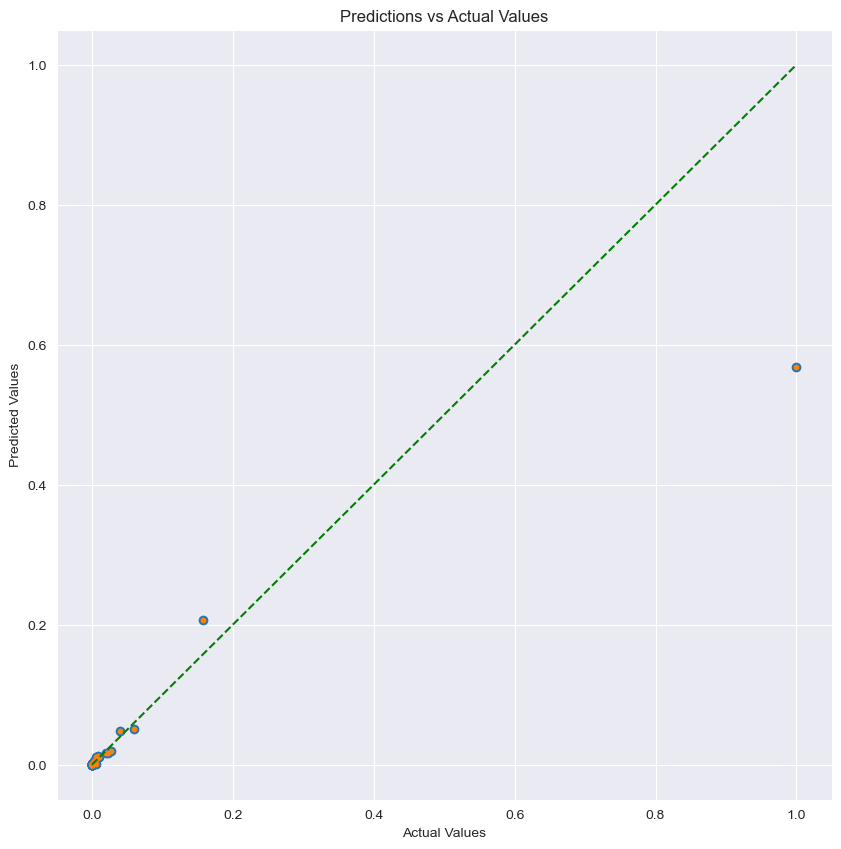

In [35]:
# 1. Scatter Plot (Predictions vs Actuals)
plt.figure(figsize=(10, 10))
# plt.yscale('log')
# plt.xscale('log')
plt.scatter(Y_cme_fl_test, y_cme_fl_pred)
plt.scatter(Y_cme_fl_test, y_cme_fl_pred, s = 10 , alpha=1)
min_val = min(min(Y_cme_fl_test), min(y_cme_fl_pred))  # Smallest value in data
max_val = max(max(Y_cme_fl_test), max(y_cme_fl_pred))  # Largest value in data
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='Perfect Prediction Line')
plt.title("Predictions vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


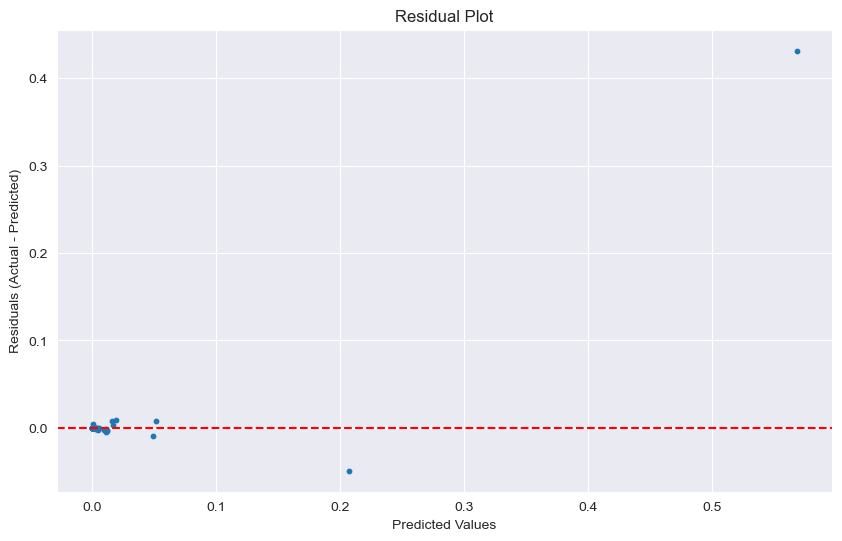

In [36]:
# 2. Residual Plot
residuals_cme_fl = Y_cme_fl_test - y_cme_fl_pred
plt.figure(figsize=(10, 6))
# plt.yscale('log')
# plt.xscale('log')
plt.scatter(y_cme_fl_pred, residuals_cme_fl, s = 10, alpha = 1)
plt.axhline(y=0, color='red', linestyle='--')  # Perfect prediction line
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


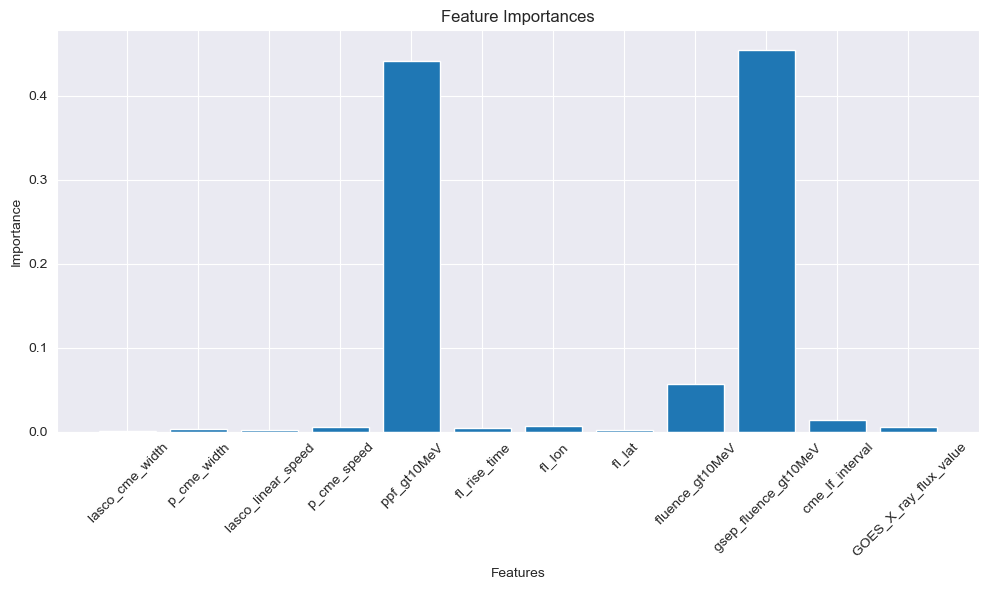

In [38]:
# 3. Feature Importances
feature_importances_cme_fl = cme_fl_rf_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_cme_fl)), feature_importances_cme_fl, align='center')
plt.xticks(range(len(feature_importances_cme_fl)), [f" {X_cme_fl.columns[i]}" for i in range(len(X_cme_fl.columns))], rotation=45)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()